In [31]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
from sklearn import datasets

In [32]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [33]:
housing_df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
housing_df["HousingPrice"] = housing.target
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousingPrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [34]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousingPrice
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [35]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MedInc        20640 non-null  float64
 1   HouseAge      20640 non-null  float64
 2   AveRooms      20640 non-null  float64
 3   AveBedrms     20640 non-null  float64
 4   Population    20640 non-null  float64
 5   AveOccup      20640 non-null  float64
 6   Latitude      20640 non-null  float64
 7   Longitude     20640 non-null  float64
 8   HousingPrice  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [36]:
housing_df.isna().sum()

MedInc          0
HouseAge        0
AveRooms        0
AveBedrms       0
Population      0
AveOccup        0
Latitude        0
Longitude       0
HousingPrice    0
dtype: int64

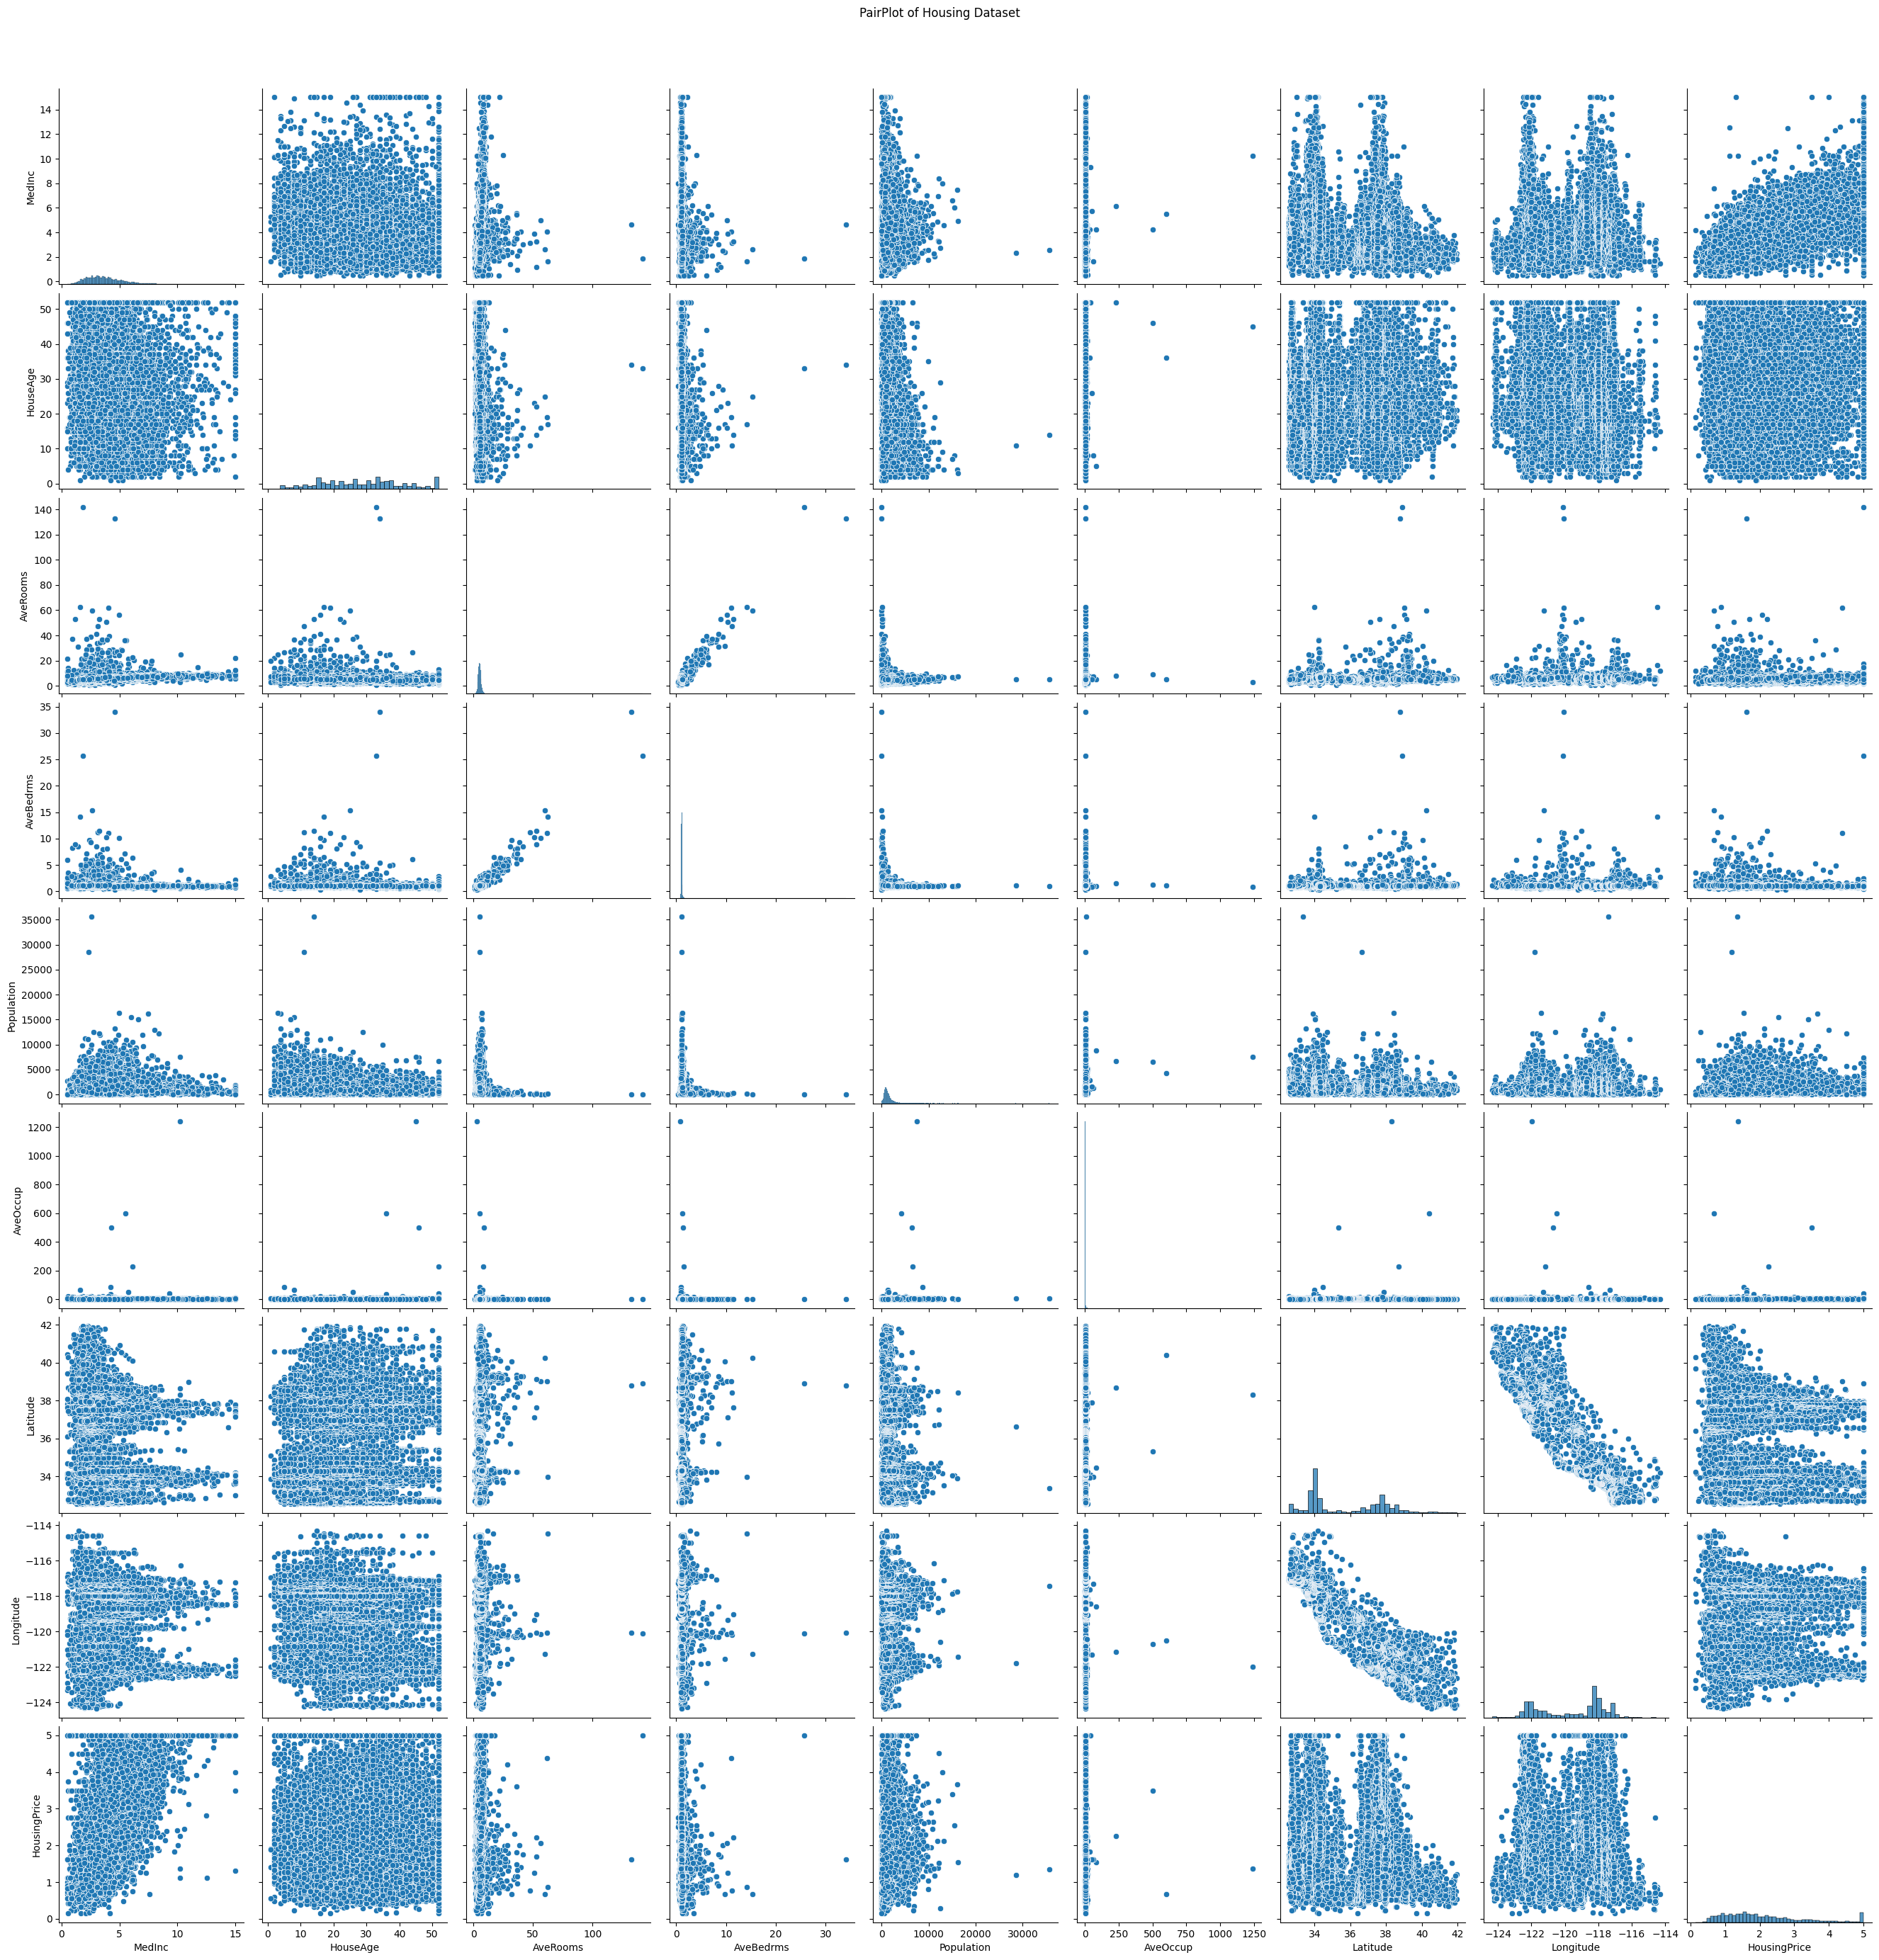

In [37]:
sns.pairplot(housing_df, height=3)
plt.suptitle("PairPlot of Housing Dataset",y=1.03)
plt.show()

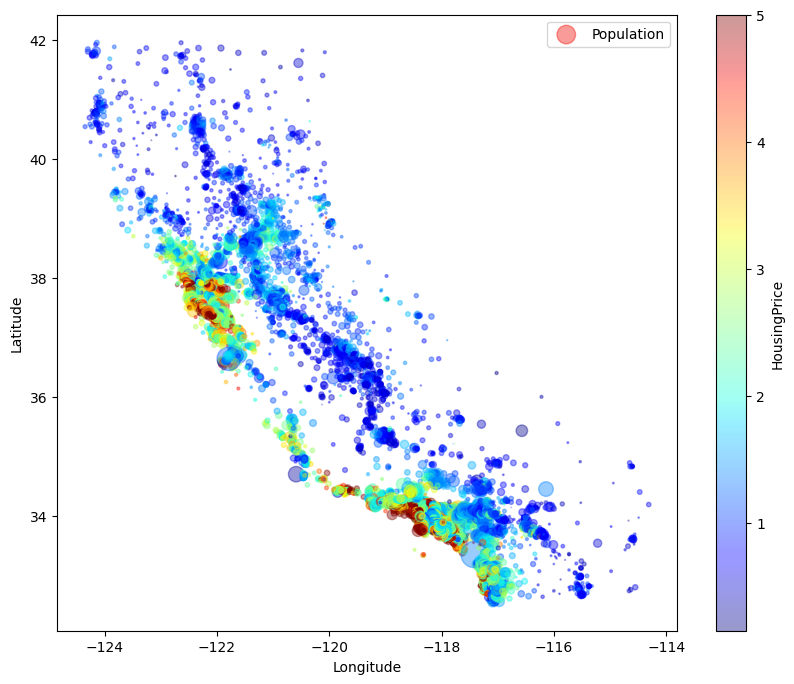

In [38]:
housing_df.plot(
    kind='scatter',
    x= 'Longitude',
    y= "Latitude",
    alpha= 0.4,
    s= housing_df['Population']/100,
    label= "Population",
    c= "HousingPrice",
    cmap= "jet",
    colorbar=True,
    figsize=(10,8)
)
plt.show()

In [39]:
coor = housing_df.corr()
coor

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousingPrice
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
HousingPrice,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


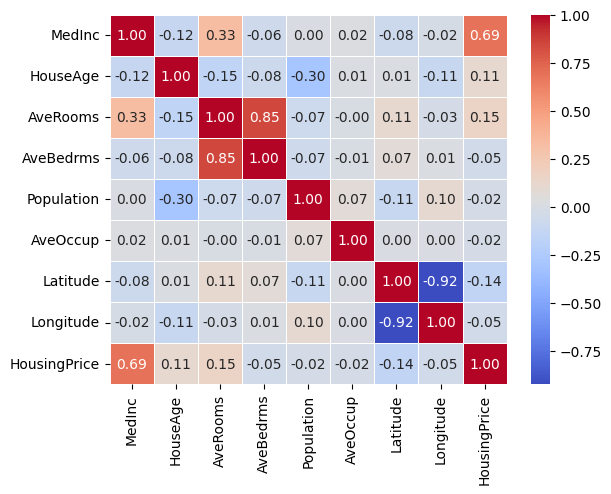

In [40]:
plt.Figure(figsize=(10,8))
sns.heatmap(coor,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.show()

In [41]:
coor['HousingPrice'].abs().sort_values(ascending=False)

HousingPrice    1.000000
MedInc          0.688075
AveRooms        0.151948
Latitude        0.144160
HouseAge        0.105623
AveBedrms       0.046701
Longitude       0.045967
Population      0.024650
AveOccup        0.023737
Name: HousingPrice, dtype: float64

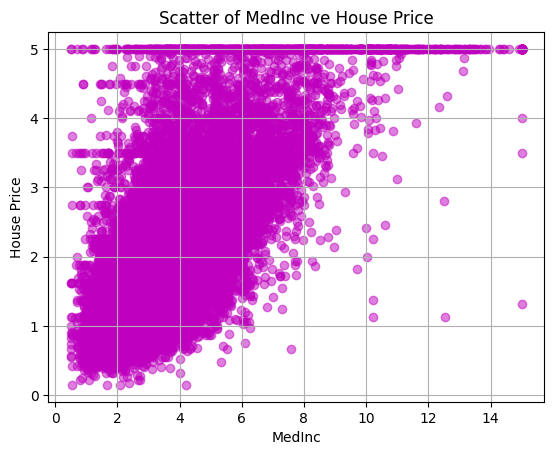

In [42]:
medinc = housing_df['MedInc']
housing = housing_df['HousingPrice']
plt.Figure(figsize=(10,8))
plt.scatter(medinc,housing,alpha=0.5,color="m")
plt.xlabel("MedInc")
plt.ylabel("House Price")
plt.title("Scatter of MedInc ve House Price")
plt.grid(True)
plt.show()